In [ ]:

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('AAPL(1).csv')
df

In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df

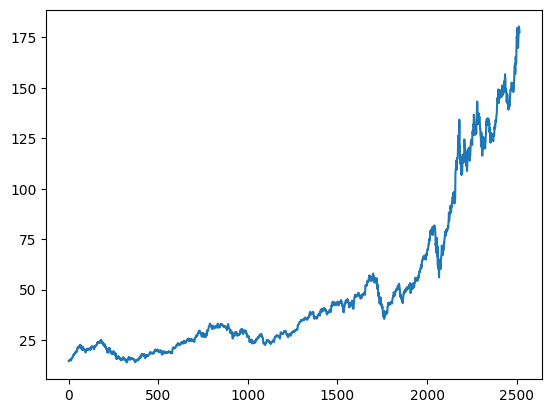

In [ ]:
plt.plot(df.Close)

In [ ]:
# Spliting the datatset into Training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

In [ ]:
# MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array

In [ ]:
data_training_array.shape

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model= Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units =120, activation ='relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 1))


In [ ]:
model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs =50)

In [ ]:
model.save('modellstm2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
data_testing.head()

,Close
1761,35.547501
1762,37.064999
1763,36.982498
1764,37.687500
1765,38.327499


In [ ]:
data_training.tail(1000)

,Close
761,27.555000
762,27.450001
763,26.705000
764,26.497499
765,27.180000
...,...
1756,39.292500
1757,39.037498
1758,39.057499
1759,39.435001


In [ ]:
past_100_days = data_training.tail(100)

final_df = past_100_days.append(data_testing, ignore_index = True)

<ipython-input-21-1175ea6c15b9>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [ ]:
final_df.head()

,Close
0,52.220001
1,51.882500
2,52.217499
3,52.437500
4,52.560001


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.11515549],
       [0.1128244 ],
       [0.11513821],
       [0.11665774],
       [0.11750384],
       [0.12282217],
       [0.13017802],
       [0.12651737],
       [0.12579211],
       [0.1258094 ],
       [0.12656916],
       [0.12772607],
       [0.13079965],
       [0.13383867],
       [0.13950234],
       [0.14304214],
       [0.14753164],
       [0.14879215],
       [0.14621931],
       [0.13970957],
       [0.13660145],
       [0.13147306],
       [0.14100462],
       [0.13620431],
       [0.14542503],
       [0.14098733],
       [0.13069604],
       [0.13131767],
       [0.13154213],
       [0.1344085 ],
       [0.13031616],
       [0.1357208 ],
       [0.13813824],
       [0.13508193],
       [0.142904  ],
       [0.14426813],
       [0.14689274],
       [0.15038074],
       [0.15519832],
       [0.14815326],
       [0.14176435],
       [0.14086647],
       [0.14621931],
       [0.12807141],
       [0.12477335],
       [0.1380001 ],
       [0.12979814],
       [0.138

In [ ]:
input_data.shape

(856, 1)

In [ ]:
x_test =[]
y_test =[]

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

In [ ]:
#Making Predictions
y_predicted = model.predict(x_test)
y_predicted.shape

In [ ]:
y_test

In [ ]:
y_predicted

In [ ]:
scaler.scale_

array([0.00690691])

In [ ]:
scale_factor = 1/0.00633935
y_predicted = y_predicted*scale_factor
y_test = y_test * scale_factor

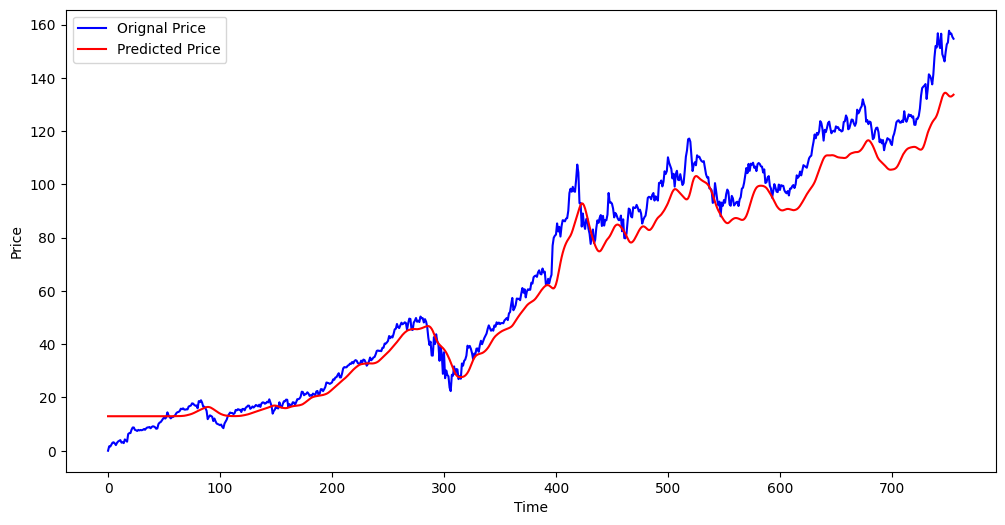

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Orignal Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model


df = pd.read_csv('AAPL.csv')

start_date = df['Date'].max()
dates = pd.date_range(start_date, periods=30)

X = df[['Close']].values[-100:]


model = load_model('modellstm2.h5')

for date in dates:

  x = X[-100:].reshape((1,100,1))


  yhat = model.predict(x)[0]

  X = np.vstack([X[1:], [yhat]])

predictions = X[-30:]

print(predictions)

In [ ]:
y_pred_original = predictions
y_pred_original.shape

data=y_pred_original

In [ ]:
normalizedData = (data-np.min(data))/(np.max(data)-np.min(data))
normalizedData

In [ ]:
y_pred_original=normalizedData

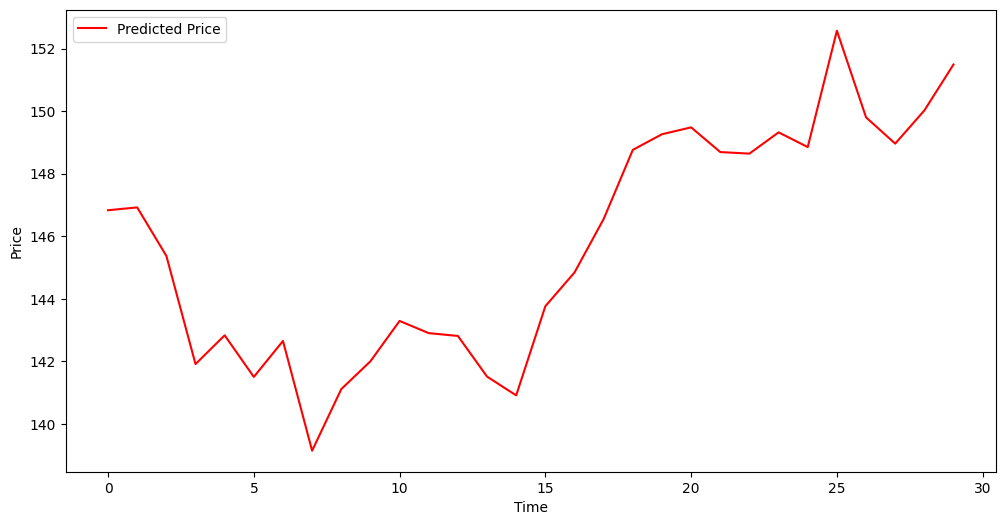

In [ ]:
y_pred_original = predictions

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(y_pred_original, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()